<center><h1><span>WR 304 Assignment 2: Temperature & Evapotranspiration</span></h1></center>
<center><h3><span>Cunningham Creek / Leadville Airport</span></h3></center>
<center><h3>Jared Grove</h3></center<br>
<center><h3>1 September 2020</h3></center>

In [1]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# reads data file
df = pd.read_csv('Leadville_Lake_County_Airport.csv')

# creates TAVG column and calculates mean between TMAX and TMIN
df['TAVG'] = df[['TMAX', 'TMIN']].mean(axis=1)

# converts DATE column to datetime object and formats to month
df["DATE"] = pd.to_datetime(df['DATE']).dt.strftime("%B")

# creates a dataframe with only the columns needed for the assignment
df_main = df[['DATE', 'AWND', 'PRCP', 'TMAX', 'TMIN', 'TAVG']]

df_main

,DATE,AWND,PRCP,TMAX,TMIN,TAVG
0,September,3.9,0.0,17.8,2.2,10.00
1,September,3.5,0.0,21.1,0.0,10.55
2,September,2.9,0.0,21.7,2.8,12.25
3,September,2.5,3.6,17.2,1.1,9.15
4,September,1.7,5.8,15.6,3.3,9.45
...,...,...,...,...,...,...
360,August,3.8,0.8,17.8,5.6,11.70
361,August,3.1,0.0,19.4,2.2,10.80
362,August,1.9,0.0,21.7,1.1,11.40
363,August,2.1,0.0,22.2,1.7,11.95


In [3]:
# group by month and find mean of each column
df_monthavg = df_main.groupby('DATE').mean()

# reindex with sorted date column
new_index = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 
             'August', 'September', 'October', 'November', 'December']

df_monthavg = df_monthavg.reindex(new_index).reset_index()

df_monthavg

,DATE,AWND,PRCP,TMAX,TMIN,TAVG
0,January,3.312903,0.522581,0.829032,-11.945161,-5.558065
1,February,3.650000,1.257143,0.696429,-11.996429,-5.650000
2,March,3.303333,0.745161,5.089655,-9.612903,-2.717742
3,April,3.240000,2.093333,6.458621,-7.200000,-0.370690
4,May,3.090323,1.625806,9.970968,-1.929032,4.020968
5,June,2.940000,0.846667,20.776667,2.223333,11.500000
6,July,2.725806,1.367742,19.867742,4.077419,11.972581
7,August,2.883871,0.487097,21.216129,3.722581,12.469355
8,September,2.766667,0.986667,17.536667,1.243333,9.390000
9,October,3.232258,0.474194,11.416129,-3.245161,4.085484


<h1><span>Temperature Plot</span></h1>


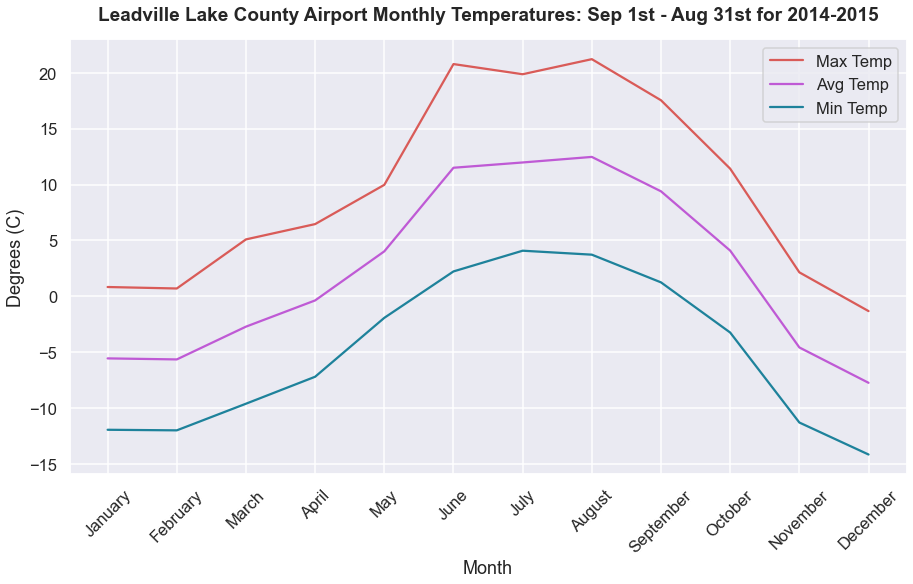

In [4]:
# sets style of plot
plt.figure(figsize=(15,8))
sns.set(style='darkgrid')
sns.set_context('talk')

# plots lines and legend from dataframe
sns.lineplot(x='DATE', 
             y='TMAX', 
             data=df_monthavg, 
             sort=False, 
             color='#d95b58')
sns.lineplot(x='DATE', 
             y='TAVG', 
             data=df_monthavg, 
             sort=False, 
             color='#bf5ad5')
sns.lineplot(x='DATE', 
             y='TMIN', 
             data=df_monthavg, 
             sort=False, 
             color='#1e829b')
plt.legend(labels=['Max Temp', 'Avg Temp', 'Min Temp'])

# plots/formats labels
plt.title('Leadville Lake County Airport Monthly Temperatures: Sep 1st - Aug 31st for 2014-2015', 
          weight='bold', 
          y=1.03).set_fontsize('19')
plt.xlabel('Month')
plt.ylabel('Degrees (C)')
plt.xticks(rotation=45)

plt.show()

In [5]:
# filter data with certain criteria
df_mainfilter = df_main[(df_main['PRCP'] == 0) & (df_main['TAVG'] > 10) & (df_main['AWND'] > 2.5)]

df_mainfilter

,DATE,AWND,PRCP,TMAX,TMIN,TAVG
1,September,3.5,0.0,21.1,0.0,10.55
2,September,2.9,0.0,21.7,2.8,12.25
19,September,2.6,0.0,22.2,2.2,12.20
272,May,3.5,0.0,17.8,2.8,10.30
281,June,2.7,0.0,21.7,0.6,11.15
290,June,2.8,0.0,22.8,1.7,12.25
291,June,2.8,0.0,22.8,1.1,11.95
293,June,2.8,0.0,25.0,2.2,13.60
294,June,3.6,0.0,25.0,3.9,14.45
295,June,3.4,0.0,25.0,5.6,15.30


In [6]:
# number of days per year that match filter criteria
len(df_mainfilter)

42

In [7]:
# percent of days that match filter criteria in a year
pct = len(df_mainfilter)/len(df_main) * 100

round(pct, 2)

11.51

In [8]:
# maximum and minimum temps 
max_temp = df_main['TMAX'].max()
min_temp = df_main['TMIN'].min()

max_temp, min_temp 

(26.1, -26.6)

In [9]:
# average annual mean temp
mean_temp = df_main['TAVG'].mean()

round(mean_temp, 2)

2.29

<h1>Questions</h1>

<b>1. Examining the provided watershed location map and using the scale bar, approximately how far
away (straight-line distance) is your weather station (blue square) from your streamflow gauge
(red star)? Give the answer in miles or kilometers but specify your units.</b>
<ul>The water station is approximately 19 miles away from the streamflow gauge.</ul>

<b>2a. What is the elevation of your station?</b>
<ul>The elevation at the Leadville weather station is 3027.3 meters</ul>

<b>2b. When does the meteorological data record for the site start? When does it end?</b>
<ul>The record for the meterological data started in 1948 on August 1st and ended in 2020 on August 30th. </ul>

<b>2c. How much data coverage is provided?</b>
<ul>Currently, 95% of data coverage is available.</ul>

<b>2d. Has the station ever been relocated, and if so, how many times since its original establishment?</b>
<ul>From 1895 to 1982 the weather station has moved latitudes three times and from 1976 to present it moved latitude and longitude four times. In total the weather station slightly moved seven times.</ul>

<b>2e. What type of temperature meter is used at the site? i.e. what is it called?</b>
<ul>The type of temperature meter used at this site currently is a max-min thermometer.</ul>

<b>3a. What are the maximum and minimum temperatures recorded at your site?</b>
<ul>The maximum temperature is 26.1 degrees celsius and the minimum temperature is -26.6 degrees celsius.</ul>

<b>3b. What is the average annual mean temperature?</b>
<ul>The average annual mean temperature is 2.29 degrees celsius.</ul>

<b>3c. Using days with no precipitation, average temperatures above 10 degrees C, and average
windspeed above 2.5 m/s as a proxy for increased evaporative losses (ET), how many days
per year do these conditions occur? What percentage of the total number of days is this?
What months are these conditions most likely?</b>
<ul>Out of the conditions specified 44 days qualify as a proxy for increased evaporative losses. The percentage of days this occurs in one year is 12.05% and the most likely months for this condition to occur are June, July, and August.</ul>
